In [ ]:
import pandas as pd
train=pd.read_csv("/content/DailyDelhiClimateTrain.csv")
test=pd.read_csv("/content/DailyDelhiClimateTest.csv")
print("train data")
print(train)
print("test data")
print(test)

train data
            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]
test data
           date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.000000
1    2017-01-02  18.500000  77.222

In [ ]:
import numpy as np
numeric_columns = train.select_dtypes(include=np.number).columns
mean_values = test[numeric_columns].mean()
print("mean:")
print(mean_values)


median_values = train[numeric_columns].median()
print("\nMedian:")
print(median_values)
std_values =train[numeric_columns].std()
print("\nstd Values:")
print(std_values)


mean
meantemp          21.713079
humidity          56.258362
wind_speed         8.143924
meanpressure    1004.035090
dtype: float64

Median of test Values:
meantemp          27.714286
humidity          62.625000
wind_speed         6.221667
meanpressure    1008.563492
dtype: float64

std Values:
meantemp          7.348103
humidity         16.769652
wind_speed        4.561602
meanpressure    180.231668
dtype: float64


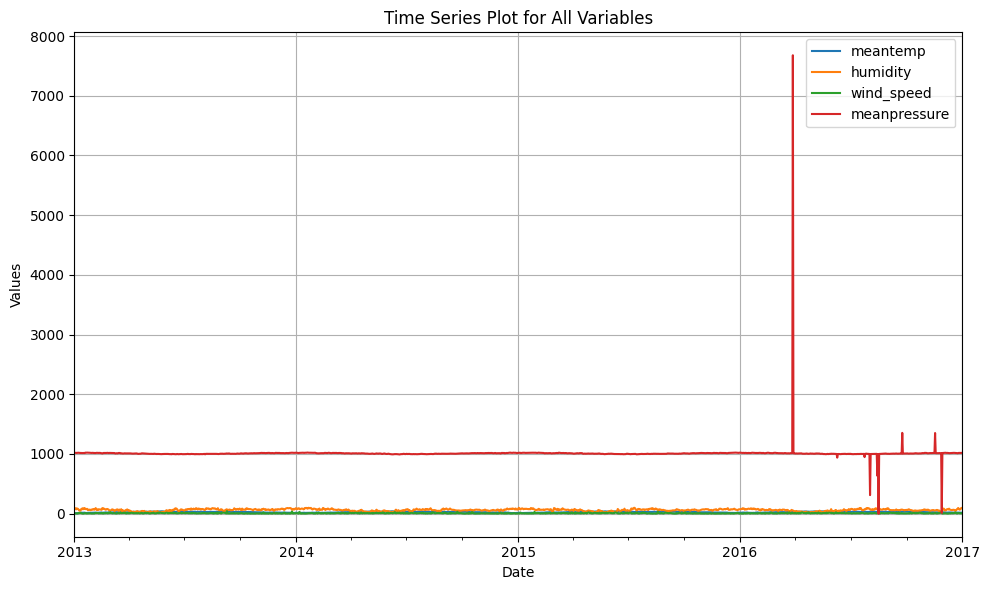

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
train.plot(ax=plt.gca())
plt.title('Time Series Plot for All Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

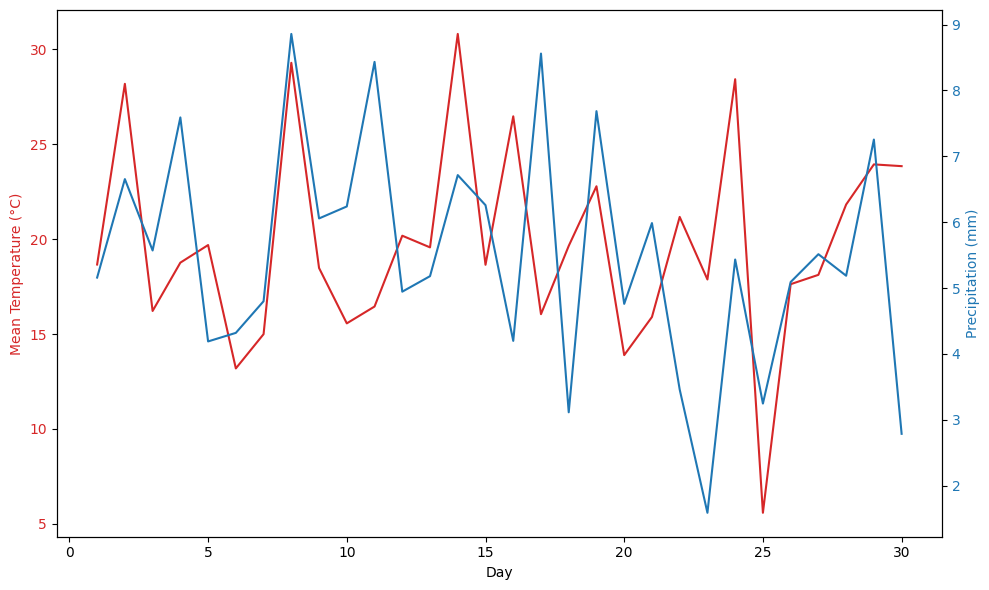

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
days = np.arange(1, 31)
meantemp = np.random.normal(20, 5, 30)
meanpressure = np.random.normal(5, 2, 30)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(days, meantemp, color='tab:red', label='Mean Temperature (°C)')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Temperature (°C)', color='tab:red')

ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()
ax2.plot(days,meanpressure, color='tab:blue', label='Precipitation (mm)')
ax2.set_ylabel('Precipitation (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show()


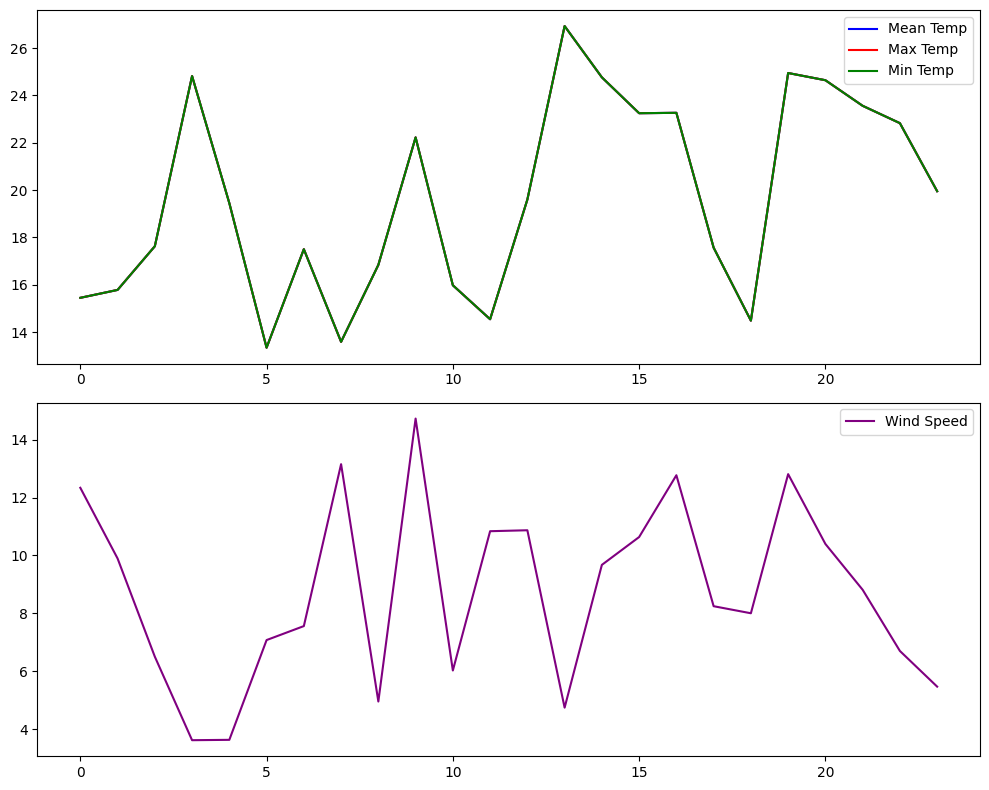

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
time = np.arange(0, 24, 1)
meantemp = np.random.normal(20, 5, 24)
temp_max = meantemp + np.random.normal(5, 2, 24)
temp_min = temp_mean - np.random.normal(5, 2, 24)
wind_speed = np.random.normal(10, 3, 24)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(time, meantemp, label='Mean Temp', color='b')
axs[0].plot(time,meantemp, label='Max Temp', color='r')
axs[0].plot(time, meantemp, label='Min Temp', color='g')
axs[0].legend()
axs[1].plot(time, wind_speed, label='Wind Speed', color='purple')
axs[1].legend()
plt.tight_layout()
plt.show()


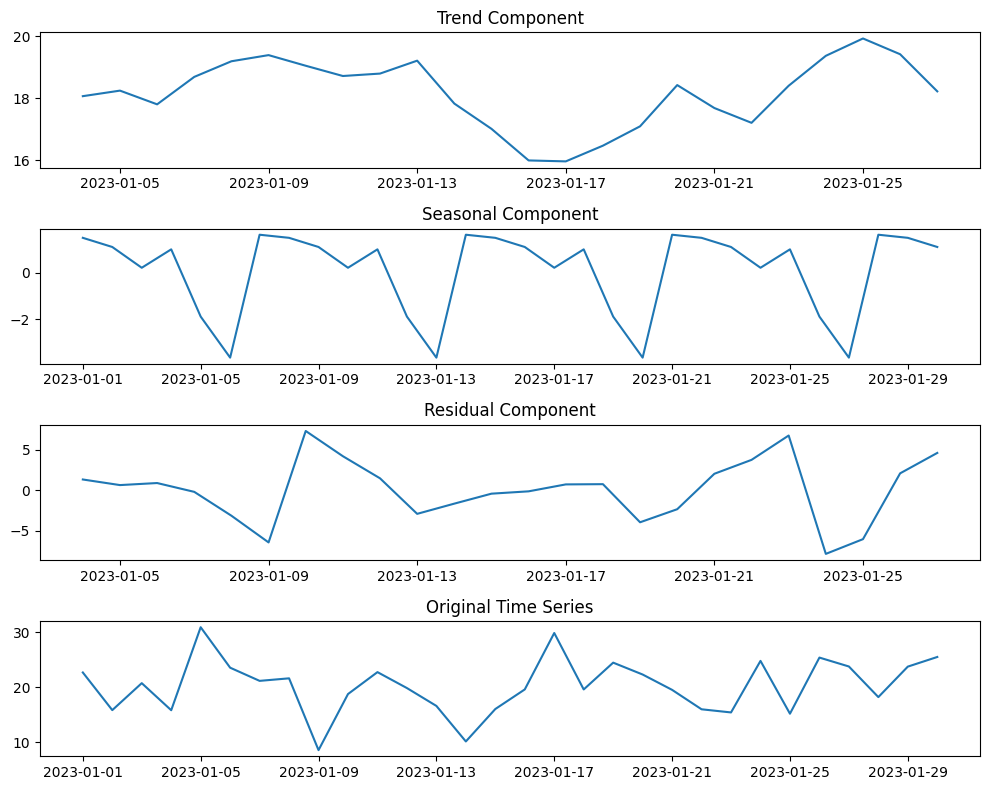

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

days = pd.date_range(start='2023-01-01', periods=30, freq='D')
meantemp= np.random.normal(20, 5, 30)
humidity = pd.Series(meantemp, index=days)
decomposition = seasonal_decompose(humidity, model='additive', period=7)
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(temperature_series)
plt.title('Original Time Series')

plt.tight_layout()
plt.show()


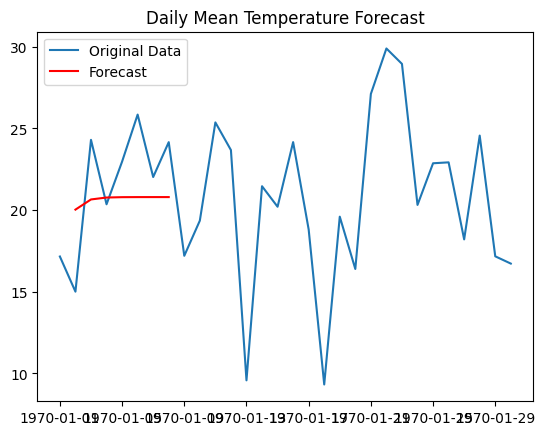

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
meantemp= np.random.normal(20, 5, 30)
temp_series = pd.Series(meantemp)
model = ARIMA(temp_series, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=7)

plt.plot(temp_series, label='Original Data')
plt.plot(pd.date_range(start=temp_series.index[-1], periods=8, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Daily Mean Temperature Forecast')
plt.show()


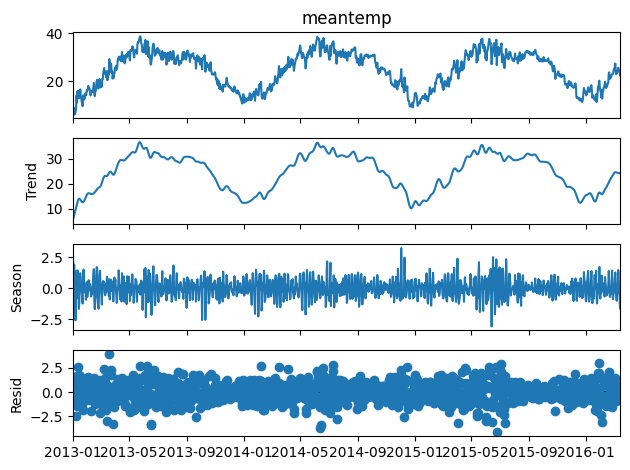

Trend Component:
date
2013-01-01     5.257826
2013-01-02     5.947771
2013-01-03     6.654018
2013-01-04     7.375254
2013-01-05     8.108301
                ...    
2016-03-10    24.304166
2016-03-11    24.254634
2016-03-12    24.210815
2016-03-13    24.174157
2016-03-14    24.144532
Name: trend, Length: 1169, dtype: float64
Seasonal Component:
date
2013-01-01    3.213282
2013-01-02    1.777413
2013-01-03   -0.343319
2013-01-04    1.911716
2013-01-05   -1.506829
                ...   
2016-03-10    1.479992
2016-03-11    1.268935
2016-03-12   -0.248588
2016-03-13   -0.547718
2016-03-14   -1.642652
Name: season, Length: 1169, dtype: float64
Residual Component:
date
2013-01-01    1.528892
2013-01-02   -0.325184
2013-01-03    0.855968
2013-01-04   -0.620304
2013-01-05   -0.601472
                ...   
2016-03-10   -0.221658
2016-03-11   -0.456902
2016-03-12    0.600273
2016-03-13    0.623560
2016-03-14   -0.126879
Name: resid, Length: 1169, dtype: float64


In [36]:
from statsmodels.tsa.seasonal import STL
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(train['meantemp'], test_size=0.2, shuffle=False)
stl = STL(train_data, seasonal=5)
result = stl.fit()
result.plot()
plt.show()
trend = result.trend
seasonal = result.seasonal
residual = result.resid
print("Trend Component:")
print(trend)
print("Seasonal Component:")
print(seasonal)
print("Residual Component:")
print(residual)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import STL

target_column = 'meantemp'

train_data, test_data = train_test_split(train[target_column], test_size=0.2, shuffle=False)

stl = STL(train_data, seasonal=5)
result = stl.fit()

forecast = result.trend[-len(test_data):]

mae = mean_absolute_error(test_data, forecast)
rmse = sqrt(mean_squared_error(test_data, forecast))

print(f'Mean : {mae}')
print(f'Root Mean Squared: {rmse}')


Mean : 6.695789328857273
Root Mean Squared: 8.176736464458639
